In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
data = np.loadtxt("https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt")

In [19]:
t = data[:, 2]
x = data[:, 4]
s = data[:, -1]

In [20]:
t -= t[0]
s[s <= 0.] = 0.1

In [21]:
def model1(x, a, b):
    return a * x + b

def model2(x, a, b, c):
    return a * x ** 2 + b * x + c

In [22]:
popt1, pcov1 = optimize.curve_fit(model1, t, x, sigma=s, absolute_sigma=True)
popt2, pcov2 = optimize.curve_fit(model2, t, x, sigma=s, absolute_sigma=True)

In [23]:
xhat1 = model1(t, *popt1)
xhat2 = model2(t, *popt2)

In [28]:
chi21 = np.sum(((x - xhat1) / s) ** 2) / (t.shape[0] - len(popt1))
chi22 = np.sum(((x - xhat2) / s) ** 2) / (t.shape[0] - len(popt2))

In [29]:
chi21
#chi22

np.float64(982.2601732545479)

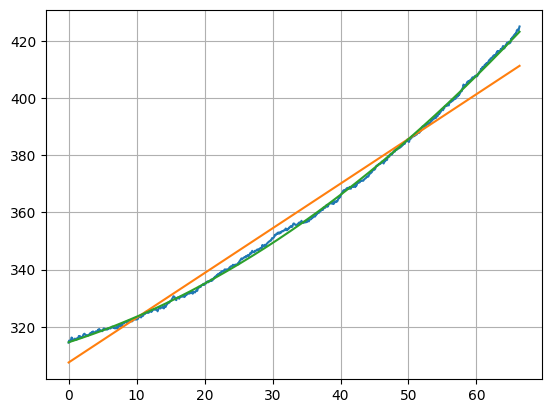

In [26]:
fig, axe = plt.subplots()
axe.plot(t, x)
axe.plot(t, xhat1)
axe.plot(t, xhat2)
axe.grid()